# Exam Project | Face Detector
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

In [1]:
import cv2
import math
from matplotlib import pyplot as plt

In [2]:
class FaceDetector:
    """some info"""

    classifier = None

    classifier_paths = {
        'FACE_ALT': '../cascade-classifiers/haarcascade_frontalface_alt.xml',
        'FACE_ALT2': '../cascade-classifiers/haarcascade_frontalface_alt2.xml',
        'FACE_DEFAULT': '../cascade-classifiers/haarcascade_frontalface_default.xml',
    }

    def __init__(self, classifier_type):
        classifier_path = self.classifier_paths[classifier_type]
        self.classifier = cv2.CascadeClassifier(classifier_path)

    def _detect(self, image):
        image_grayscaled = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        detected_faces = self.classifier.detectMultiScale(image_grayscaled)
        if len(detected_faces) == 0: return

        tmp_diagonal = 0
        tmp_face = None
        for (x, y, w, h) in detected_faces:
            diagonal = math.sqrt(w ** 2 + h ** 2)
            
            if diagonal > tmp_diagonal: 
                tmp_diagonal = diagonal
                tmp_face = (x, y, w, h)

        return tmp_face

    def crop(self, image):
        face = self._detect(image)
        if not face: return

        (x, y, w, h) = face
        cropped_image = image[y:y+h, x:x+w]
        return cropped_image

    def mark(self, image):
        face = self._detect(image)
        if not face: return

        (x, y, w, h) = face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        return image

In [3]:
image_path = '../data/face-data/detection1.jpg'
image = cv2.imread(image_path)

face_detector = FaceDetector('FACE_DEFAULT')
crop_image = face_detector.crop(image)
face_image = face_detector.mark(image)

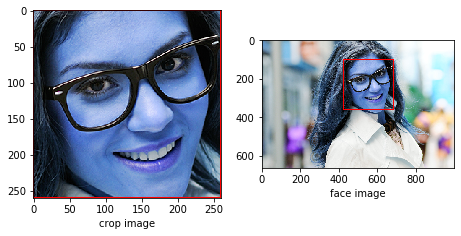

In [4]:
plt.figure(figsize=(20,20))

plt.subplot(5, 5, 1)
plt.xlabel('crop image')
plt.imshow(crop_image)

plt.subplot(5, 5, 2)
plt.xlabel('face image')
plt.imshow(face_image)

plt.show()